In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

x_scaled = sx.fit_transform(df.drop("price", axis="columns"))
y_scaled = sy.fit_transform(df[["price"]])

In [5]:
x_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
w = np.ones(shape=(2))
total_samples = x_scaled.shape[0]
y_predict = np.dot(w, x_scaled.T) + 0
y_predict

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [7]:
total_samples = x_scaled.shape[0]
total_samples

20

In [8]:
w

array([1., 1.])

In [9]:
x_scaled.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [10]:
def gradient_desent(X, y_truth, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]

    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epochs_list = []

    for i in range(epochs):
        # w1 * area + w2 * bedroom + bias
        y_predict = np.dot(w, X.T) + b

        w_grad = -(2/total_samples)*(X.T.dot(y_truth-y_predict))
        b_grad = -(2/total_samples)*np.sum(y_truth-y_predict)

        w = w - learning_rate*w_grad
        b = b - learning_rate*b_grad

        cost = np.mean(np.square(y_predict -y_truth))

        if i%10==0:
            cost_list.append(cost)
            epochs_list.append(i)
    return w, b, cost, cost_list, epochs_list

w, b, cost, cost_list, epochs_list = gradient_desent(x_scaled, y_scaled.reshape(y_scaled.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]),
 np.float64(-0.23034857438407427),
 np.float64(0.0068641890429808105))

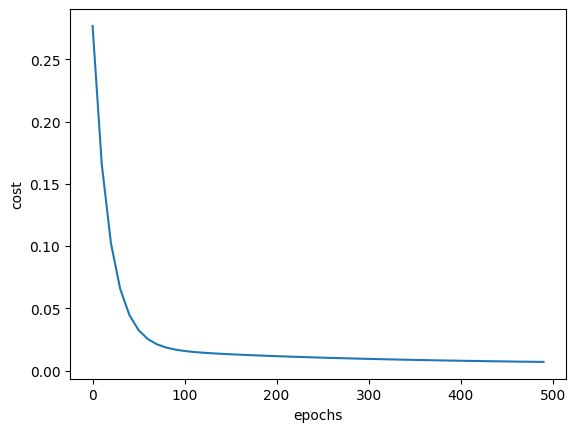

In [11]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epochs_list,cost_list)

In [12]:
def predict(area, bedrooms, w, b):
    x_scaled = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * x_scaled[0] + w[1] * x_scaled[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\niraj.meshram\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(128.45484403267596)

In [13]:
x_scaled.shape[0]

20

In [14]:
w = np.ones(shape=(2))
w

array([1., 1.])

In [15]:
total_samples = X.shape[0]

NameError: name 'X' is not defined

In [16]:
import random
random_index = random.randint(0,x_scaled.shape[0])
random_index

3

In [17]:
def stochastic_gradient_descent(X, y_truth, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list_sgd = []
    epochs_list_sgd = []

    
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_truth[random_index]
        # w1 * area + w2 * bedroom + bias
        y_predict = np.dot(w,sample_x.T) 

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predict))
        b_grad = -(2/total_samples)*(sample_y-y_predict)

        w = w -learning_rate*w_grad
        b = b -learning_rate*b_grad

        cost_sgd = np.square(sample_y - y_predict)

        if i%100==0:
            cost_list_sgd.append(cost_sgd)
            epochs_list_sgd.append(i)
    return w, b, cost_sgd, cost_list_sgd, epochs_list_sgd

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epochs_list_sgd = stochastic_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.58649245, 0.3810551 ]),
 np.float64(-1.281214996657267),
 np.float64(0.02572208080326959))

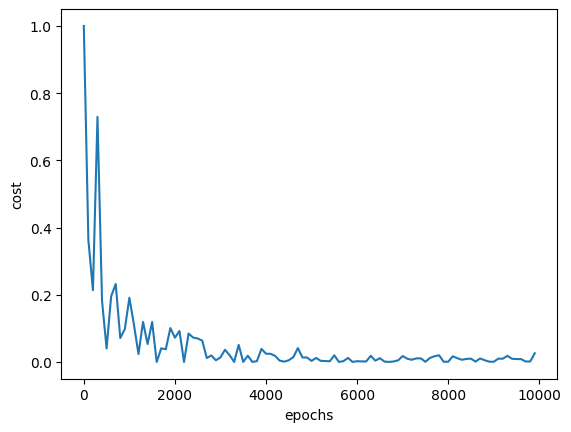

In [18]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epochs_list_sgd,cost_list_sgd)

In [19]:
def predict(area, bedrooms, w, b):
    x_scaled = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * x_scaled[0] + w[1] * x_scaled[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\niraj.meshram\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(185.9460459064258)

In [62]:
def mini_batch_gradient_descent(X, y_truth, epochs, batch_size, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list_mbdg = []
    epochs_list_mbgd = []

    for i in range(epochs):
        indices = np.random.choice(total_samples, batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y_truth[indices]

        y_predict =np.dot(X_batch,w) + b

        w_grad = -(2/batch_size) * np.dot(X_batch.T, y_batch-y_predict)
        b_grad = -(2/batch_size) * np.sum(y_batch-y_predict)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost_mbgd = np.mean(np.square(y_batch - y_predict))
        

        if i%100 == 0:
            cost_list_mbdg.append(cost_list_mbdg)
            epochs_list_mbgd.append(i)

    return w, b, cost_mbgd, cost_list_mbdg, epochs_list_mbgd

batch_size = 20

w_mbgd, b_mbgd, cost_mbgd, cost_list_mbgd, epochs_list_mbgd = mini_batch_gradient_descent(x_scaled, y_scaled.reshape(y_scaled.shape[0],), 1000, batch_size)
print(w_mbgd, b_mbgd, cost_mbgd)
    

[0.66469087 0.60541671] -0.17792104056392885 0.004865480818348848


In [57]:
indices = np.random.choice(20, 5, replace=False)
indices

array([14,  5, 17, 19, 15], dtype=int32)

In [52]:
def predict(area, bedrooms, w, b):
    x_scaled = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * x_scaled[0] + w[1] * x_scaled[1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(2600,4,w,b)

C:\Users\niraj.meshram\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(185.9460459064258)